## Section 1: Data Preprocessing

Kaggle Dataset Link: [Employee Attrition Dataset](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data)

### Import and load the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBRFClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [3]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Data Exploration

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.shape

(1470, 35)

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
df.select_dtypes(include = 'object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [10]:
len(df.select_dtypes(include = 'object').columns)

9

In [11]:
df.select_dtypes(include = ['int64', 'float64']).columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [12]:
len(df.select_dtypes(include = ['int64', 'float64']).columns)

26

### Restructure the dataset

In [13]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [14]:
#EmployeeCount, EmployeeNumber, Over18, StandardHours
#Employee attrition is not related to above 4 columns - so drop from dataset
df['EmployeeCount'].nunique()

1

In [15]:
df['EmployeeCount'].unique()

array([1])

In [16]:
df['Over18'].nunique()

1

In [17]:
df['Over18'].unique()

array(['Y'], dtype=object)

In [18]:
df['StandardHours'].nunique()

1

In [19]:
df['StandardHours'].unique()

array([80])

In [20]:
df = df.drop(columns = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'])

In [21]:
df.shape

(1470, 31)

### Dealing with missing values

In [22]:
#There are no missing values within the dataset
df.isna().values.any()

False

In [23]:
df.isna().values.sum()

0

### Countplot

In [24]:
countsign = df['Attrition'].value_counts().sort_values(ascending = True)
countsign

Yes     237
No     1233
Name: Attrition, dtype: int64

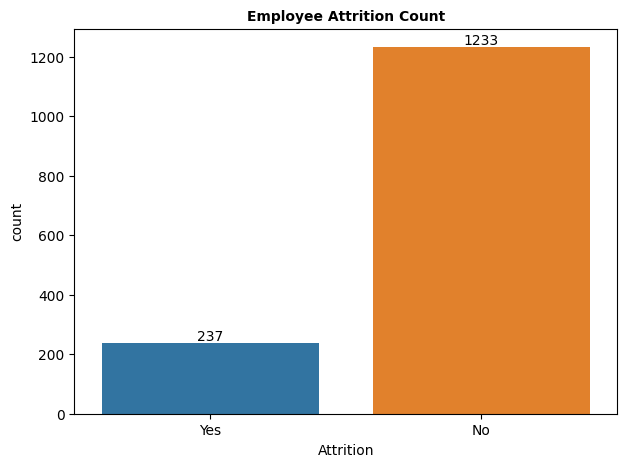

In [25]:
plt.figure(figsize = (7,5))
ax = sns.countplot(x = "Attrition", data = df, hue = "Attrition")
for label in ax.containers:
  ax.bar_label(label)
plt.title("Employee Attrition Count", font = 'sans serif', color = 'black', weight = 'bold')
plt.show()

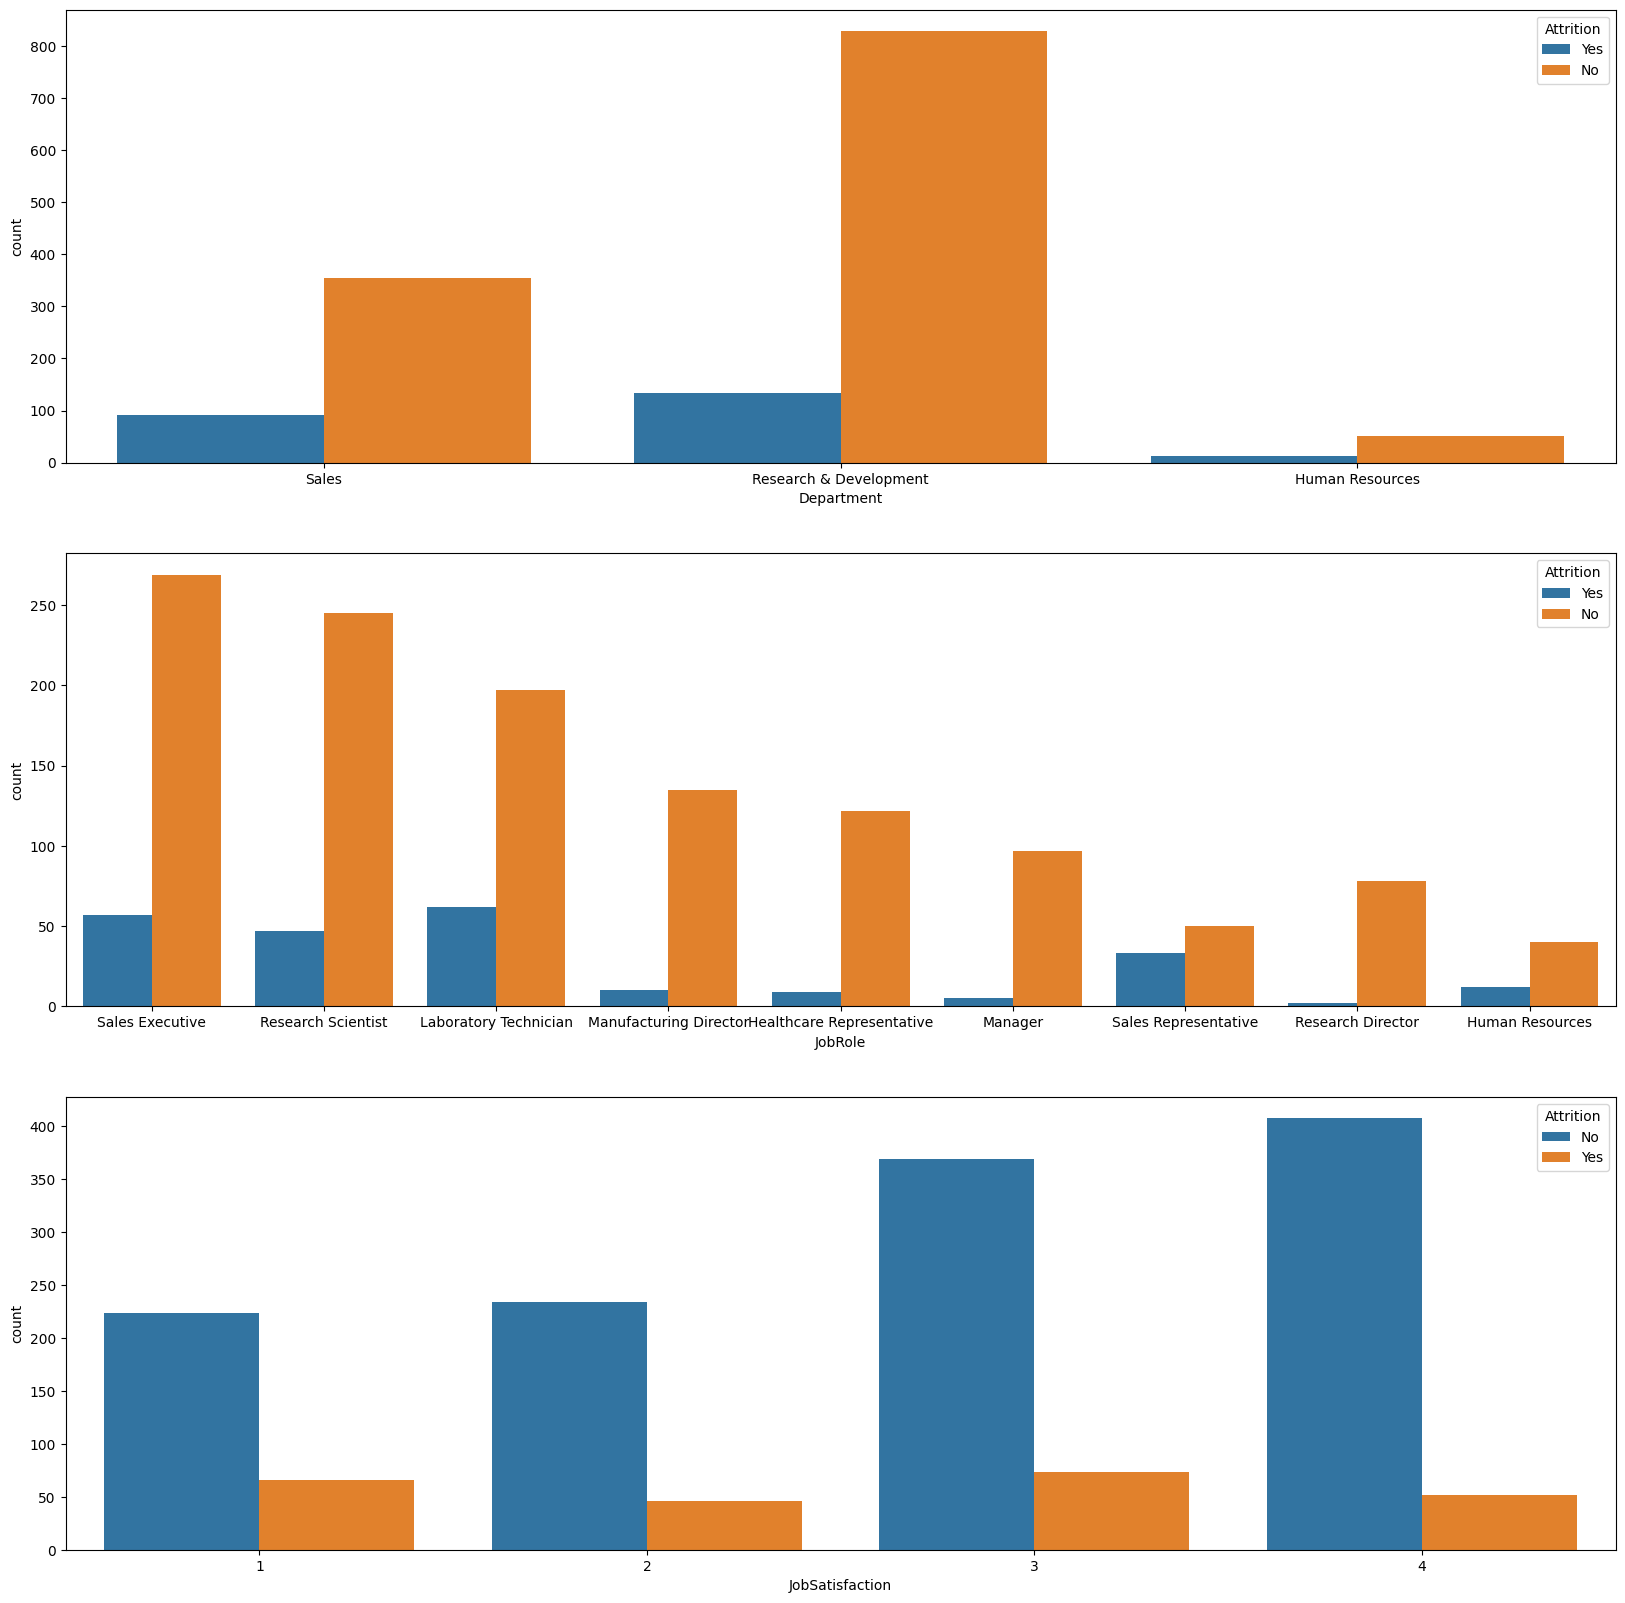

In [26]:
plt.figure(figsize=(20,20))

plt.subplot(311)
sns.countplot(data = df, x = 'Department', hue = 'Attrition')
plt.subplot(312)
sns.countplot(data = df, x = 'JobRole', hue = 'Attrition')
plt.subplot(313)
sns.countplot(data = df, x = 'JobSatisfaction', hue = 'Attrition')
plt.show()

### Correlation matrix and Heatmap

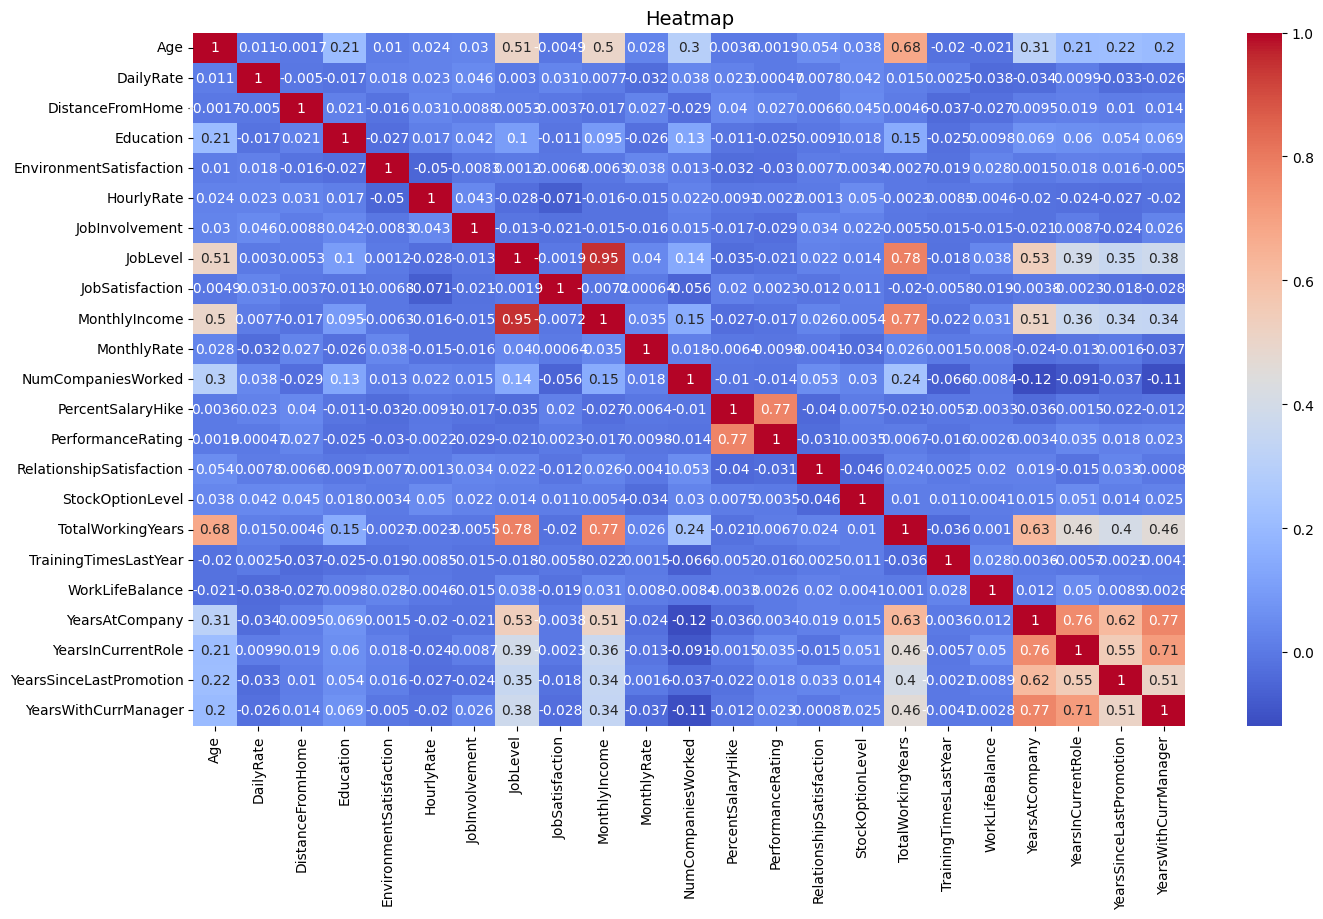

In [27]:
plt.figure(figsize =(16,9))
ax = sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title("Heatmap", font = 'sans serif', fontsize = 14, color ='black')
plt.show()

### Dealing with categorical data

In [28]:
df.select_dtypes(include = 'object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [29]:
len(df.select_dtypes(include = 'object').columns)

8

In [30]:
df.shape

(1470, 31)

In [31]:
#One Hot Encoding
df = pd.get_dummies(data= df, drop_first = True)

In [32]:
df.shape

(1470, 45)

In [33]:
df.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,1,0,0


In [34]:
df.rename(columns = {'Attrition_Yes' : 'Attrition'}, inplace = True)

In [35]:
df.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,1,0,0


In [36]:
df.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Res

### Splitting the dataset into train and test sets

In [37]:
x = df.drop(columns = 'Attrition')

In [38]:
y = df['Attrition']

In [39]:
x.shape

(1470, 44)

In [40]:
y.shape

(1470,)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 , random_state =0)

In [42]:
x_train.shape

(1176, 44)

In [43]:
x_test.shape

(294, 44)

In [44]:
y_train.shape

(1176,)

In [45]:
y_test.shape

(294,)

### Feature Scaling

In [46]:
sc = StandardScaler()

In [47]:
scaled_x_train = sc.fit_transform(x_train)
scaled_x_test = sc.transform(x_test)

In [48]:
scaled_x_train

array([[ 2.3389367 , -0.48557354,  1.45567735, ...,  1.11547067,
        -0.69900472,  1.62507442],
       [ 0.9043263 ,  0.36465323,  2.31628752, ...,  1.11547067,
        -0.69900472, -0.61535643],
       [ 0.35255307, -1.23722329,  2.0703989 , ...,  1.11547067,
        -0.69900472, -0.61535643],
       ...,
       [ 0.68361701,  0.92900666, -0.88026453, ...,  1.11547067,
        -0.69900472,  1.62507442],
       [ 0.13184377, -1.31608491, -0.88026453, ...,  1.11547067,
        -0.69900472,  1.62507442],
       [ 0.35255307, -0.35495899,  0.10328995, ..., -0.89648256,
        -0.69900472, -0.61535643]])

In [49]:
scaled_x_test

array([[-0.08886552, -0.41164077,  0.10328995, ..., -0.89648256,
         1.43060551, -0.61535643],
       [-0.41992946, -0.5595063 ,  1.94745459, ..., -0.89648256,
         1.43060551, -0.61535643],
       [-0.19922017, -0.34510129,  1.08684442, ...,  1.11547067,
        -0.69900472,  1.62507442],
       ...,
       [-0.64063875, -1.36290899, -0.38848729, ...,  1.11547067,
        -0.69900472,  1.62507442],
       [ 0.13184377,  1.13108954, -0.88026453, ...,  1.11547067,
        -0.69900472, -0.61535643],
       [ 0.35255307, -1.06717794, -0.14259867, ...,  1.11547067,
        -0.69900472,  1.62507442]])

## Section 2: Model Building

### 1) Logistic Regression

In [50]:
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(scaled_x_train,y_train)

LogisticRegression(random_state=0)

In [51]:
y_pred = classifier_lr.predict(scaled_x_test)

In [52]:
acc = accuracy_score(y_test,y_pred)
print(acc*100)

88.43537414965986


In [53]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[237,   8],
       [ 26,  23]])

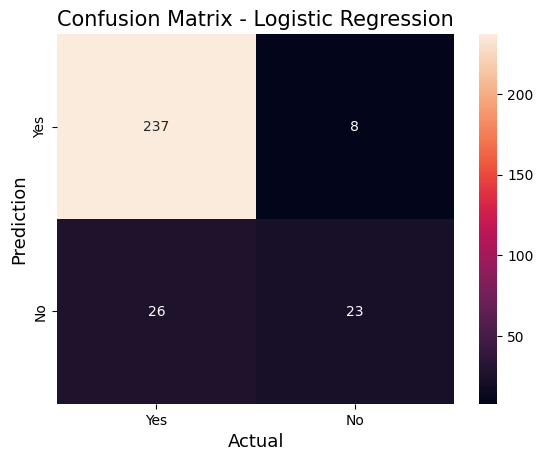

In [54]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Yes','No'],
            yticklabels=['Yes','No'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix - Logistic Regression',fontsize=15)
plt.show()

### 2) Random Forest

In [55]:
classifier_rf = RandomForestClassifier(random_state=0)
classifier_rf.fit(scaled_x_train,y_train)

RandomForestClassifier(random_state=0)

In [56]:
y_pred = classifier_rf.predict(scaled_x_test)

In [57]:
acc = accuracy_score(y_test,y_pred)
print(acc*100)

85.71428571428571


In [58]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[243,   2],
       [ 40,   9]])

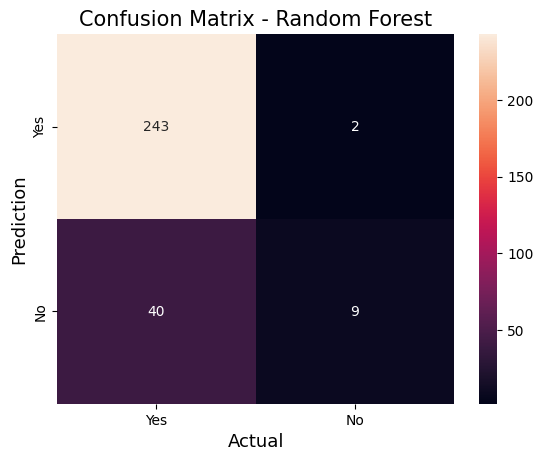

In [59]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Yes','No'],
            yticklabels=['Yes','No'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix - Random Forest',fontsize=15)
plt.show()

### 3) Support Vector Machines

In [60]:
classifier_svc =SVC(random_state=0)
classifier_svc.fit(scaled_x_train,y_train)

SVC(random_state=0)

In [61]:
y_pred = classifier_svc.predict(scaled_x_test)

In [62]:
acc = accuracy_score(y_test,y_pred)
print(acc*100)

86.73469387755102


In [63]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[243,   2],
       [ 37,  12]])

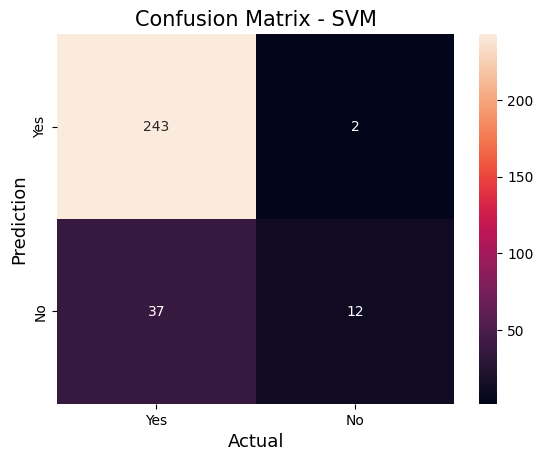

In [64]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Yes','No'],
            yticklabels=['Yes','No'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix - SVM',fontsize=15)
plt.show()

### 4) XGBoost Classifier

In [65]:
classifier_xgb =XGBRFClassifier(random_state=0)
classifier_xgb.fit(scaled_x_train,y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=0, reg_alpha=None, ...)

In [66]:
y_pred = classifier_xgb.predict(scaled_x_test)

In [67]:
acc = accuracy_score(y_test,y_pred)
print(acc*100)

86.73469387755102


In [68]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[237,   8],
       [ 31,  18]])

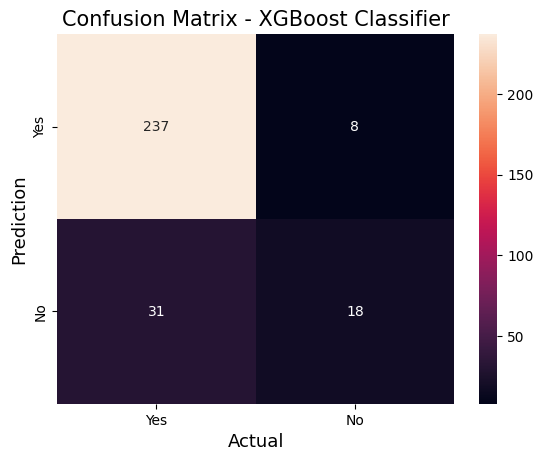

In [69]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Yes','No'],
            yticklabels=['Yes','No'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix - XGBoost Classifier',fontsize=15)
plt.show()

## Section 3: Randomized search to find the best parameters (Logistic Regression)

In [70]:
parameters = { 'C' : [ 0.25, 0.50, 0.75, 1.0, 1.25, 1.50, 1.75, 2.0],
               'penalty': ['l1'], 'solver': [ 'lbfgs', 'liblinear', 'sag', 'saga'],
               'penalty': ['l2'], 'solver': [ 'lbfgs', 'liblinear', 'sag', 'saga','newton-cg','newton-cholesky'],
               'penalty' : ['elasticnet'], 'solver' : ['saga'],
               'penalty' : ['none'],  'solver' : ['lbfgs','sag', 'saga','newton-cg','newton-cholesky' ],
               'max_iter' : [50, 100, 500, 2000, 5000]
}

In [71]:
parameters

{'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
 'penalty': ['none'],
 'solver': ['lbfgs', 'sag', 'saga', 'newton-cg', 'newton-cholesky'],
 'max_iter': [50, 100, 500, 2000, 5000]}

In [72]:
random_search = RandomizedSearchCV(estimator = classifier_lr, param_distributions = parameters, n_iter=10,
                                   scoring = 'roc_auc', n_jobs = -1, cv=5, verbose =3, error_score = 'raise' )

In [73]:
random_search.fit(scaled_x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=LogisticRegression(random_state=0), n_jobs=-1,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5,
                                              1.75, 2.0],
                                        'max_iter': [50, 100, 500, 2000, 5000],
                                        'penalty': ['none'],
                                        'solver': ['lbfgs', 'sag', 'saga',
                                                   'newton-cg',
                                                   'newton-cholesky']},
                   scoring='roc_auc', verbose=3)

In [74]:
random_search.best_estimator_

LogisticRegression(C=0.25, penalty='none', random_state=0, solver='saga')

In [75]:
random_search.best_score_

0.8168827949218012

In [76]:
random_search.best_params_

{'solver': 'saga', 'penalty': 'none', 'max_iter': 100, 'C': 0.25}

## Section 4: Final Model (Logistic Regression)

In [84]:
classifier = LogisticRegression(C=0.25, penalty='none', random_state=0, solver='saga')
classifier.fit(scaled_x_train,y_train)

LogisticRegression(C=0.25, penalty='none', random_state=0, solver='saga')

In [85]:
y_pred = classifier.predict(scaled_x_test)

In [86]:
acc = accuracy_score(y_test,y_pred)
print(acc*100)

88.43537414965986


In [87]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[237,   8],
       [ 26,  23]])

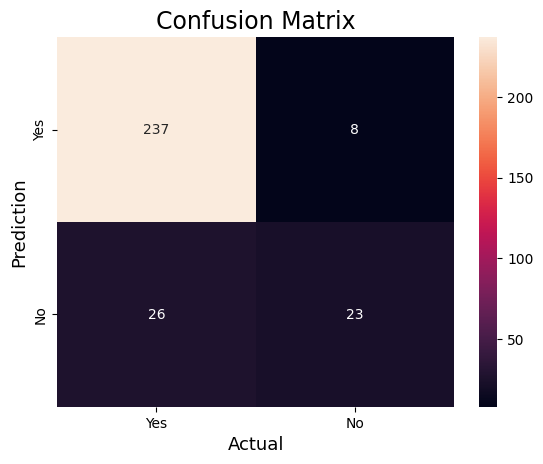

In [88]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Yes','No'],
            yticklabels=['Yes','No'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## Section 5: Predicting a single observations

In [89]:
single_obs = [[41, 1102, 1, 2, 2,	94,	3,	2, 4,	5993,	19479,	8,	11,	3,	1, 0,	8,	0,	1,	6,	4,	0,	5,
               0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]]

In [90]:
#This means that the employee chooses to leave the company
classifier.predict(sc.transform(single_obs))

array([1], dtype=uint8)